In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


In [2]:
df = pd.read_csv("../data/cleaned_sales.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.head()


,Date,Sales
0,2018-01-01,450
1,2018-01-02,470
2,2018-01-03,465


In [3]:
df.set_index('Date', inplace=True)
df.head()


,Sales
Date,
2018-01-01,450
2018-01-02,470
2018-01-03,465


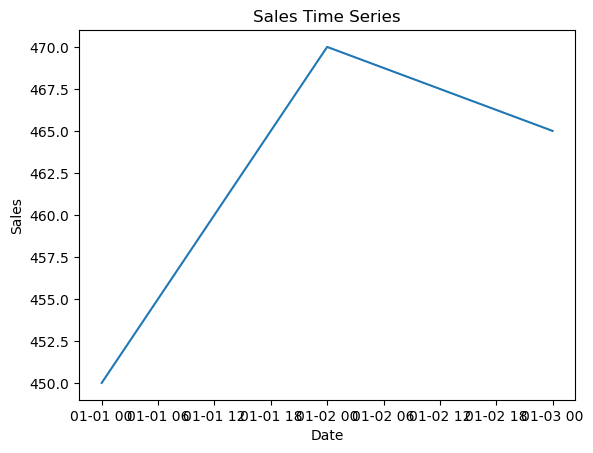

In [4]:
plt.figure()
plt.plot(df.index, df['Sales'])
plt.title("Sales Time Series")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [6]:
#result = adfuller(df['Sales'])

#print("ADF Statistic:", result[0])
#print("p-value:", result[1])


In [7]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Sales'], order=(1, 0, 0))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                    3
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -10.320
Date:                Sun, 08 Feb 2026   AIC                             26.639
Time:                        12:10:27   BIC                             23.935
Sample:                    01-01-2018   HQIC                            21.204
                         - 01-03-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        463.0816   1.02e+05      0.005      0.996   -1.99e+05    1.99e+05
ar.L1         -0.6136   2.67e+04   -2.3e-05      1.000   -5.23e+04    5.23e+04
sigma2        48.6390   1.17e+06   4.17e-05      1.0

C:\Users\samik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\samik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\samik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\samik\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3160: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
C:\Users\samik\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3160: UserWarning: Later subset of dat

In [8]:
forecast = model_fit.forecast(steps=5)
forecast


2018-01-04    461.904545
2018-01-05    463.803790
2018-01-06    462.638491
2018-01-07    463.353470
2018-01-08    462.914788
Freq: D, Name: predicted_mean, dtype: float64

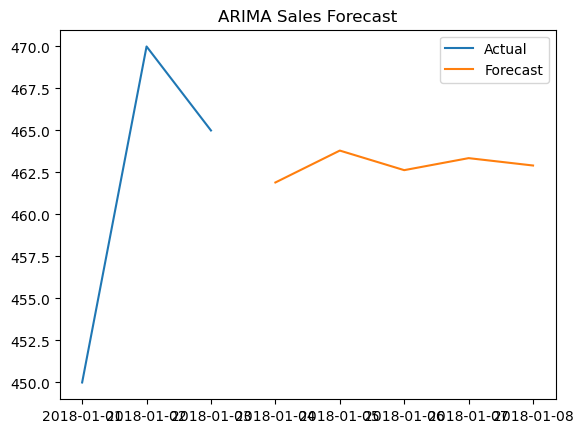

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df.index, df['Sales'], label="Actual")
plt.plot(forecast.index, forecast, label="Forecast")
plt.legend()
plt.title("ARIMA Sales Forecast")
plt.show()
